In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv


In [2]:
import missingno as msno
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv")

In [4]:
df.head(5)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,Family.History,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,S.Chloride,C.P.K,CK.MB,ESR,WBC,RBC,Hemoglobin,P.C.V,M.C.V,M.C.H,M.C.H.C,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,NO,NO,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,no,"Chest pain,",EXT. ACUTE WALL M.I,NO,4,132,341,1,2,136,1,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,0,NO,NO,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,no,"Central Chest pain,",A/W M.I,NO,4,130,305,0,0,142,1,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,NO,4,180,327,0,1,117,1,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,HTN,"CENTRAL Chest pain,",I/W M.I,NO,4,128,205,0,1,130,1,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,no,"Chest pain,",A/W M.I,NO,4,200,288,1,2,133,1,4.0,3,2,7,3,1,NO,0,0,34


In [5]:
#Reclassifying all objects into categorical data 
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = pd.Categorical(df[i])
    else:
        continue

In [6]:

#df["F.History"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
#df["Diabetes"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
#df["Thrombolysis"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
#df.cp=pd.Categorical(df.cp,categories=[1,2,3,4],ordered=True)
#df.cp = df.cp.map({1:"Grade_1",2:"Grade_2",3:"Grade_3",4:"Grade_4"})
#df["fbs"].replace(to_replace=[0,1],value=["<=120mg/dl",">120mg/dl"], inplace= True)
#df["restecg"].replace(to_replace=[0,1,2],value=["normal","ST_T_abnormal","LVH"], inplace= True)
#df["Mortality"].replace(to_replace=[0,1],value=["Died","Alive"], inplace= True)
#df["Age.Group"] = pd.Categorical(df["Age.Group"],categories=('21-30', '31-40', '41-50', '51-60', '61-70'),ordered=True)


In [7]:
df.shape

(368, 60)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype   
---  ------                                                                                    --------------  -----   
 0   Age                                                                                       368 non-null    int64   
 1   Age.Group                                                                                 368 non-null    category
 2   Gender                                                                                    368 non-null    category
 3   Locality                                                                                  368 non-null    category
 4   Marital status                                                                            368 non-null    category
 5   Life.Style                                        

In [9]:
df.describe().T.sort_values(by="mean", ascending=False).style.background_gradient(cmap="BuGn")\
.bar(subset=["mean"],color="red")

,count,mean,std,min,25%,50%,75%,max
PLATELET_COUNT,368.000000,248660.326087,76707.564945,20000.000000,192000.000000,237000.000000,287000.000000,459000.000000
WBC,368.000000,11181.277174,3517.876535,5800.000000,7800.000000,10650.000000,13500.000000,19590.000000
C.P.K,368.000000,553.888587,957.605017,52.000000,135.000000,188.000000,390.000000,4289.000000
chol,368.000000,248.940217,50.126453,131.000000,212.000000,249.000000,283.000000,409.000000
BGR,368.000000,219.991848,139.337387,60.000000,117.000000,164.000000,291.000000,563.000000
thalach,368.000000,140.923913,22.994601,71.000000,125.000000,144.000000,158.000000,195.000000
S.Sodium,368.000000,138.019022,4.079879,129.000000,135.000000,138.000000,141.000000,146.000000
trestbps,368.000000,132.741848,18.194265,100.000000,120.000000,130.000000,142.000000,200.000000
BP,368.000000,121.213315,24.539205,80.500000,100.700000,120.800000,140.700000,190.110000
S.Chloride,368.000000,103.817935,4.799751,90.000000,100.000000,104.000000,107.000000,112.000000


<AxesSubplot:>

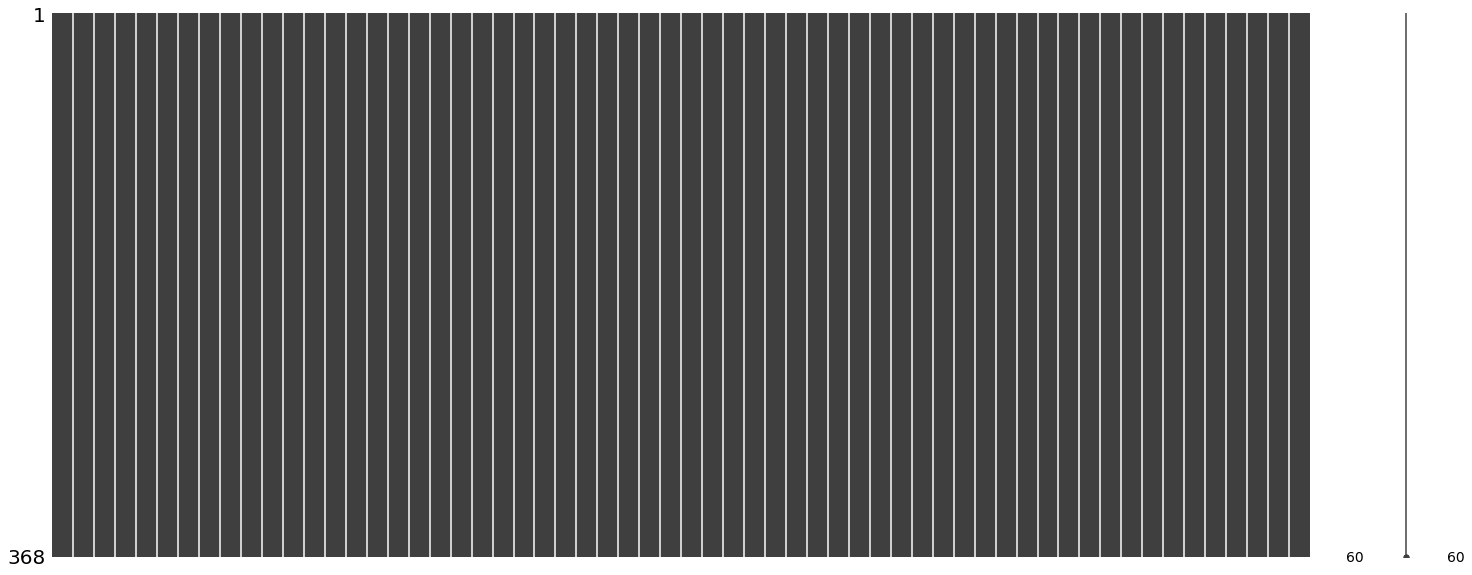

In [10]:
msno.matrix(df)

In [11]:
px.pie(df,values=df["Age.Group"].value_counts(),names=df["Age.Group"].unique(), title="AGE GROUP DISTRIBUTION")

In [12]:
px.pie(df, values = df.Gender.value_counts(), names = df.Gender.unique(), title = "SEX DISTRIBUTION")

In [13]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [14]:
px.histogram(df, x='Locality  ', color = 'Mortality', color_discrete_map= {"Alive":"blue","Died":"red"})

In [15]:
df.groupby(by=df.Mortality).mean()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,S.Chloride,C.P.K,CK.MB,ESR,WBC,RBC,Hemoglobin,P.C.V,M.C.V,M.C.H,M.C.H.C,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Follow.Up
Mortality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,54.75,0.222222,0.378472,121.745486,0.041667,228.284722,49.397917,1.559514,138.065972,4.210417,103.788194,597.736111,65.298611,26.305556,11450.381944,5.122049,13.900347,0.414722,81.236111,27.111806,0.328368,247024.305556,3.554306,0.242292,0.032118,2.215278,3.6875,133.6875,244.319444,0.145833,1.079861,141.402778,0.590278,1.622222,1.833333,1.090278,5.840278,2.097222,0.979167,0.8125,30.145833
1,52.65,0.100000,0.762500,119.297500,0.000000,190.137500,59.902500,2.283500,137.850000,4.212500,103.925000,396.037500,52.387500,27.500000,10212.500000,4.975625,13.935000,0.417250,82.792500,27.820000,0.333250,254550.000000,0.670500,0.272875,0.033875,2.400000,3.6125,129.3375,265.575000,0.125000,1.050000,139.200000,0.462500,1.252500,1.875000,0.687500,5.925000,1.812500,1.000000,0.5125,23.275000
